# Interior Design

# Custom Dataset

## Scraping data for 8 classes

In [0]:
!pip install google_images_download
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

In [0]:
chromedriver_path = '/gdrive/../content/chromedriver'

In [0]:
#queries = ["scandinavian interior design", "scandinavian living room", "scandinavian apartment", "scandinavian kitchen", "scandinavian bathroom", "scandinavian bedroom"]
#queries = ["bohemian interior design", "bohemian living room", "bohemian apartment", "bohemian kitchen", "bohemian bathroom", "bohemian bedroom"]
#queries = ["coastal interior design", "coastal living room", "coastal apartment", "coastal kitchen", "coastal bathroom", "coastal bedroom"]
#queries = ["industrial interior design", "industrial living room", "industrial apartment", "industrial kitchen", "industrial bathroom", "industrial bedroom"]
#queries = ["minimalist interior design", "minimalist living room", "minimalist apartment", "minimalist kitchen", "minimalist bathroom", "minimalist bedroom"]
#queries = ["eclectic interior design", "eclectic living room", "eclectic apartment", "eclectic kitchen", "eclectic bathroom", "eclectic bedroom"]
#queries = ["glam interior design", "glam living room", "glam apartment", "glam kitchen", "glam bathroom", "glam bedroom"]
#queries = ["classic interior design", "classic living room", "classic apartment", "classic kitchen", "classic bathroom", "classic bedroom"]

In [0]:
#queries = ["rustic interior design", "rustic living room", "rustic apartment", "rustic kitchen", "rustic bathroom", "rustic bedroom"]
#queries = ["farmhouse interior design", "farmhouse living room", "farmhouse apartment", "farmhouse kitchen", "farmhouse bathroom", "farmhouse bedroom"]
#queries = ["mid century modern interior design", "mid century modern living room", "mid century modern apartment", "mid century modern kitchen", "mid century modern bathroom", "mid century modern bedroom"]
#queries = ["modern interior design", "modern living room", "modern apartment", "modern kitchen", "modern bathroom", "modern bedroom"]
#queries = ["preppy interior design", "preppy living room", "preppy apartment", "preppy bathroom", "preppy bedroom"]
#queries = ["transitional interior design", "transitional living room", "transitional apartment", "transitional kitchen", "transitional bathroom", "transitional bedroom"]
queries = ["traditional interior design", "traditional living room", "traditional apartment", "traditional kitchen", "traditional bathroom", "traditional bedroom"]
##queries = ["global interior design", "global living room", "global apartment", "global kitchen", "global bathroom", "global bedroom"]

In [0]:
from google_images_download import google_images_download   #importing the library

for q in queries:
    keyws   = q
    limit   = 100
    chromedriver = chromedriver_path
    offset  = None  # how many links to skip
    color_type	= 'full-color'# color type you want to apply to the images.[full-color, black-and-white, transparent]
    size    = None  #relative size of the image to be downloaded. [large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP]
    usage_rights	= None #Very important! Check the doc

    arguments = {
            "keywords" : keyws,
            "limit" :limit,
            "chromedriver":chromedriver,
            "offset" : offset,
            "color_type" : color_type,
            "size" : size,
            "usage_rights" : usage_rights
            }   #creating list of arguments
    response  = google_images_download.googleimagesdownload()   #class instantiation
    response.download(arguments)  

In [0]:
import os
from tqdm import tqdm

p = '/content/downloads/'
dir_path = os.listdir('/content/downloads/')
j = 0
for path in dir_path:
    for i in tqdm(os.listdir(p+path)):
        os.rename(p + path + '/' + i, p + path + '/traditional_' + str(j)+'.jpg')
        j += 1

100%|██████████| 100/100 [00:00<00:00, 35950.15it/s]


In [0]:
from pathlib import Path
import random

dir_path = os.listdir('/content/downloads/')[4]
path = Path(p+dir_path)
rnd_file = random.sample(os.listdir(path), 5)
rnd_file

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(rnd_file)):
    plt.imshow(plt.imread(path/rnd_file[i]))
    plt.grid(b=None) #remove grid
    plt.axis('off')
    plt.show()

In [0]:
import os
os.mkdir('/content/data')

In [0]:
os.mkdir('data/traditional')

In [0]:
from distutils.dir_util import copy_tree

p = '/content/downloads/'
dir_path = os.listdir('/content/downloads/')
for d in dir_path:
    copy_tree(p+d, '/content/data/traditional')

In [0]:
len(os.listdir('/content/data/traditional'))

576

In [0]:
import shutil
shutil.rmtree('/content/downloads')

In [0]:
!du -h '/content/data/'

119M	/content/data/rustic
112M	/content/data/traditional
181M	/content/data/farmhouse
124M	/content/data/modern
145M	/content/data/midcentury
294M	/content/data/preppy
140M	/content/data/transitional
1.1G	/content/data/


In [0]:
!tar -cvf dataset.tar /content/data

In [0]:
! pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
upload = drive.CreateFile({'title': 'dataset.tar'})
upload.SetContentFile('dataset.tar')
upload.Upload()

## Get data

In [0]:
! pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1PV11g8-wPyDNzxypRbP3lqlvZB0zaTkq'})
download.GetContentFile('data_14classes.zip')



In [0]:
!unzip data_14classes.zip

In [0]:
from pathlib import Path
path = Path('data')

## EDA

In [0]:
import matplotlib.pyplot as plt
import random
import imageio
import os
%matplotlib inline

def show_images(img_path, path, classes, rows=2, columns=4):
    fig=plt.figure(figsize=(18, 9))
    for i in range(1, columns*rows+1):
        img = imageio.imread(path/img_path[i-1])    
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(f'size : {img.shape}, class : {classes[i-1]}')
        plt.axis('off')

In [0]:
rnd = random.sample(list(os.listdir(path/'bohemian')), 8)
files = rnd
classes = ['bohemian' for _ in range(8)]

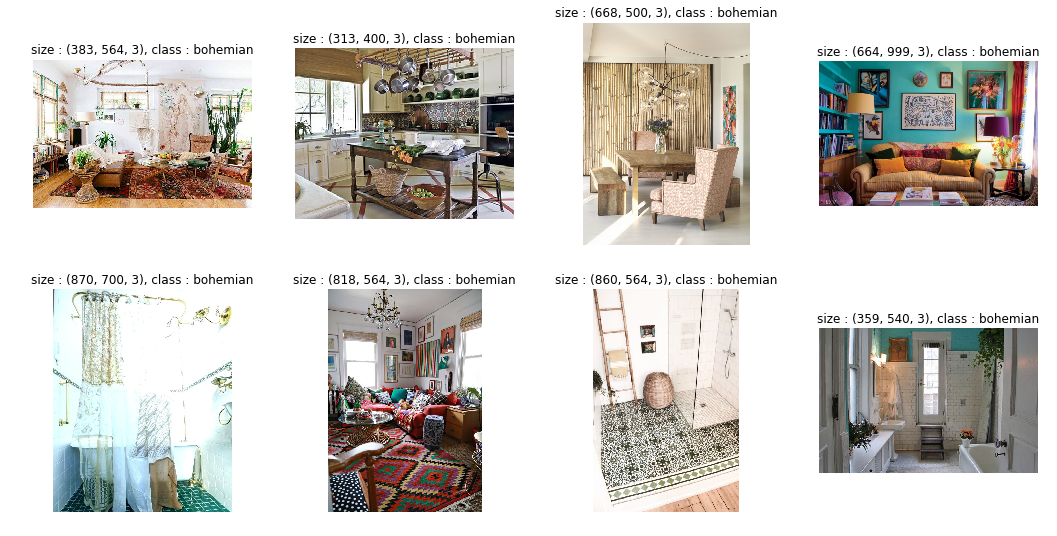

In [0]:
show_images(files, path/'bohemian', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'coastal')), 8)
files = rnd
classes = ['coastal' for _ in range(8)]

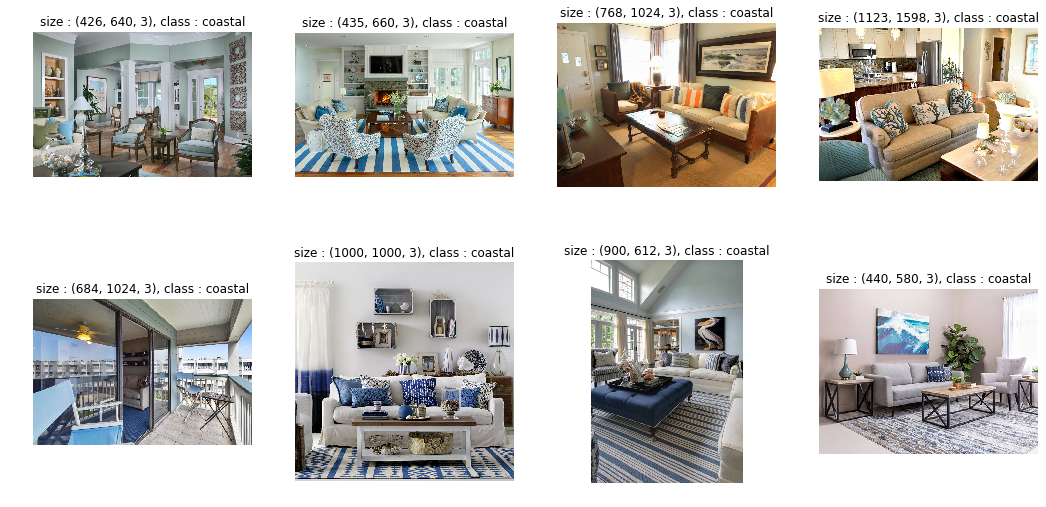

In [0]:
show_images(files, path/'coastal', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'industrial')), 8)
files = rnd
classes = ['industrial' for _ in range(8)]

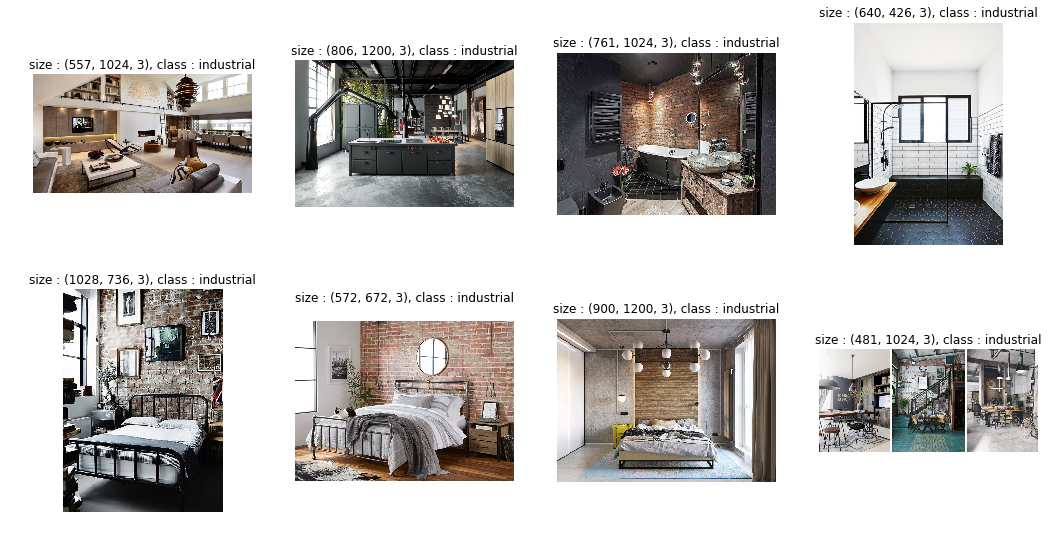

In [0]:
show_images(files, path/'industrial', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'scandinavian')), 8)
files = rnd
classes = ['scandinavian' for _ in range(8)]

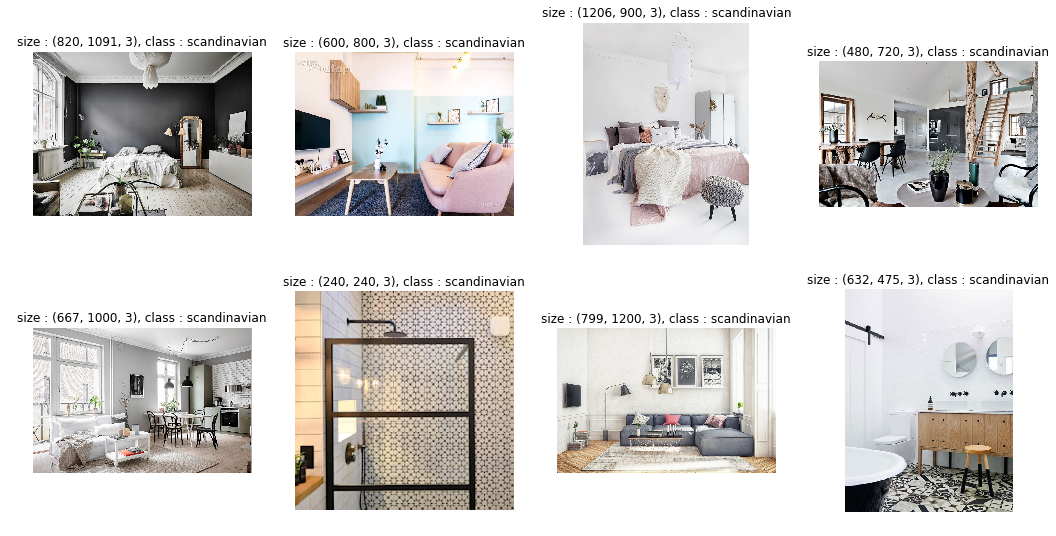

In [0]:
show_images(files, path/'scandinavian', classes)

## Fastai

In [0]:
# import required fastai libraries

from fastai.vision import *
from fastai.callbacks import *
import numpy as np
import os

In [0]:
# path to dataset
path = Path('/content/data/').resolve()

In [0]:
# we will apply transformations such as lightining, zoom, changing brightness and
# changing contrast and resizing it to size 224 which is required for resnet50

tfms = get_transforms(do_flip=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.2)

# batch size
bs = 64

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_folder(path) #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_folder())           #grab the labels from name of folders

In [0]:
# create databunch

data = (src.transform(tfms, size=224, resize_method=ResizeMethod.SQUISH)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

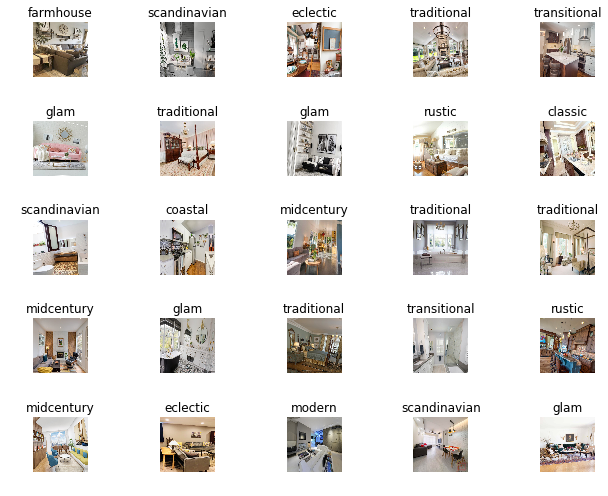

In [0]:
# show me sample images from dataset

data.show_batch(rows=5, figsize=(9, 7))

In [0]:
# print all the classes
print(data.classes)

['bohemian', 'classic', 'coastal', 'eclectic', 'farmhouse', 'glam', 'industrial', 'midcentury', 'minimalist', 'modern', 'rustic', 'scandinavian', 'traditional', 'transitional']


In [0]:
# and number of classes
print(len(data.classes))

14


(Category rustic, Image (3, 764, 1150), None)

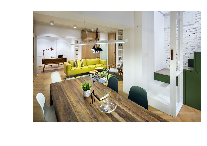

In [0]:
data.train_ds.y[0], data.train_ds.x[0], data.train_ds.x[0].show()

## Experiement Final : Classes -> 14 Number of images -> 7000

### Using Resnet 50

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


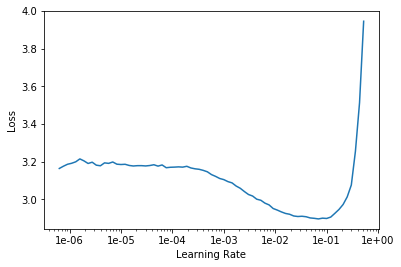

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

lr = 1e-2
learn.fit_one_cycle(7, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_1')])

Better model found at epoch 0 with accuracy value: 0.3166441023349762.
Better model found at epoch 1 with accuracy value: 0.3572395145893097.
Better model found at epoch 2 with accuracy value: 0.40257105231285095.
Better model found at epoch 3 with accuracy value: 0.4384303092956543.
Better model found at epoch 4 with accuracy value: 0.46008118987083435.
Better model found at epoch 6 with accuracy value: 0.4621109664440155.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


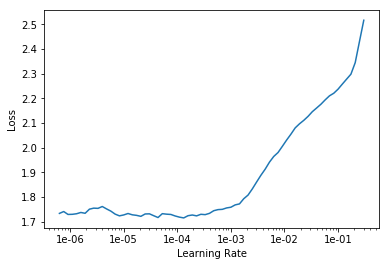

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs
lr = 1e-02
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_2')])

Better model found at epoch 0 with accuracy value: 0.4580514132976532.
Better model found at epoch 1 with accuracy value: 0.4634641408920288.
Better model found at epoch 3 with accuracy value: 0.46684709191322327.


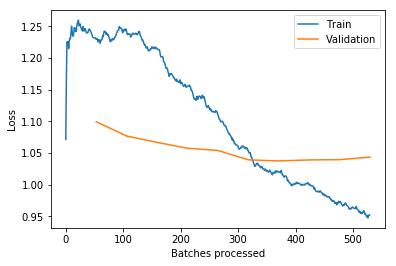

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
data = (src.transform(tfms, size=512)  #resize images to 224
        .databunch(bs=bs//4)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


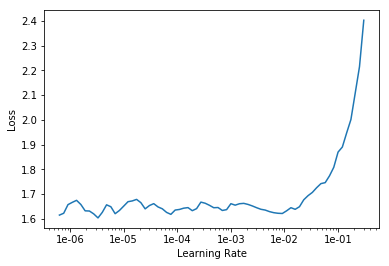

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

learn.fit_one_cycle(7, slice(5e-03), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_512_1')])

Better model found at epoch 0 with accuracy value: 0.5372124314308167.
Better model found at epoch 4 with accuracy value: 0.5439783334732056.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


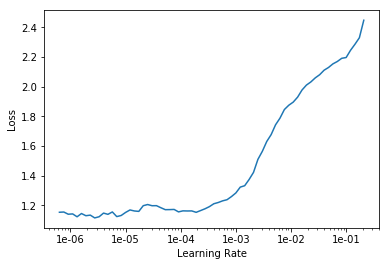

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs
lr = 1e-02
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_512_2')])

Better model found at epoch 0 with accuracy value: 0.5399187803268433.
Better model found at epoch 1 with accuracy value: 0.5433017611503601.
Better model found at epoch 5 with accuracy value: 0.5446549654006958.
Better model found at epoch 6 with accuracy value: 0.5487144589424133.


In [0]:
# load best model

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('resnet_512_2')

## Experiement Final : Classes -> 15 Living Room

### Using Resnet 50

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 90320483.98it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


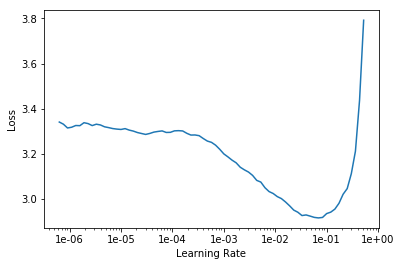

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

lr = 1e-2
learn.fit_one_cycle(7, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_1')])

Better model found at epoch 0 with accuracy value: 0.3186003565788269.
Better model found at epoch 1 with accuracy value: 0.35543277859687805.
Better model found at epoch 3 with accuracy value: 0.3775322139263153.
Better model found at epoch 4 with accuracy value: 0.440147340297699.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


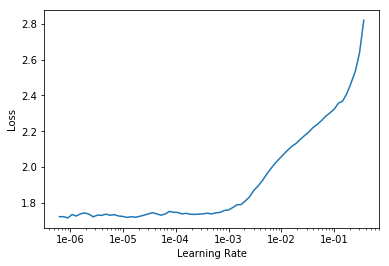

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs
lr = 1e-02
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_2')])

Better model found at epoch 0 with accuracy value: 0.44383057951927185.
Better model found at epoch 1 with accuracy value: 0.4511970579624176.


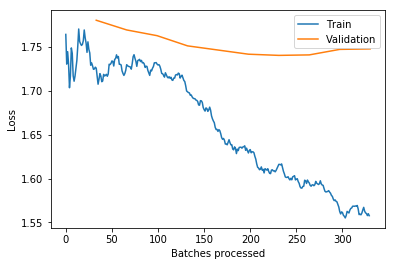

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
data = (src.transform(tfms, size=512)  #resize images to 224
        .databunch(bs=bs//4)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


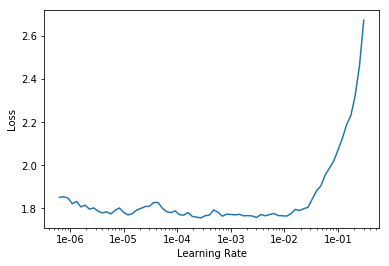

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

learn.fit_one_cycle(7, slice(5e-03), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_512_1')])

Better model found at epoch 0 with accuracy value: 0.521178662776947.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


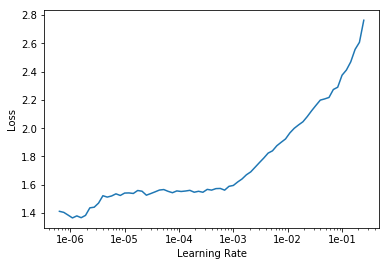

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs
lr = 1e-02
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_512_2')])

Better model found at epoch 0 with accuracy value: 0.5267034769058228.
Better model found at epoch 1 with accuracy value: 0.541436493396759.
Better model found at epoch 2 with accuracy value: 0.5488029718399048.
Better model found at epoch 3 with accuracy value: 0.559852659702301.
Better model found at epoch 6 with accuracy value: 0.5616942644119263.


In [0]:
# load best model

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('resnet_512_2')

In [0]:
# yay! show me what you learned
# tta is fancy method called test time augmentation

interp = ClassificationInterpretation.from_learner(learn, tta=True)

losses,idxs = interp.top_losses()

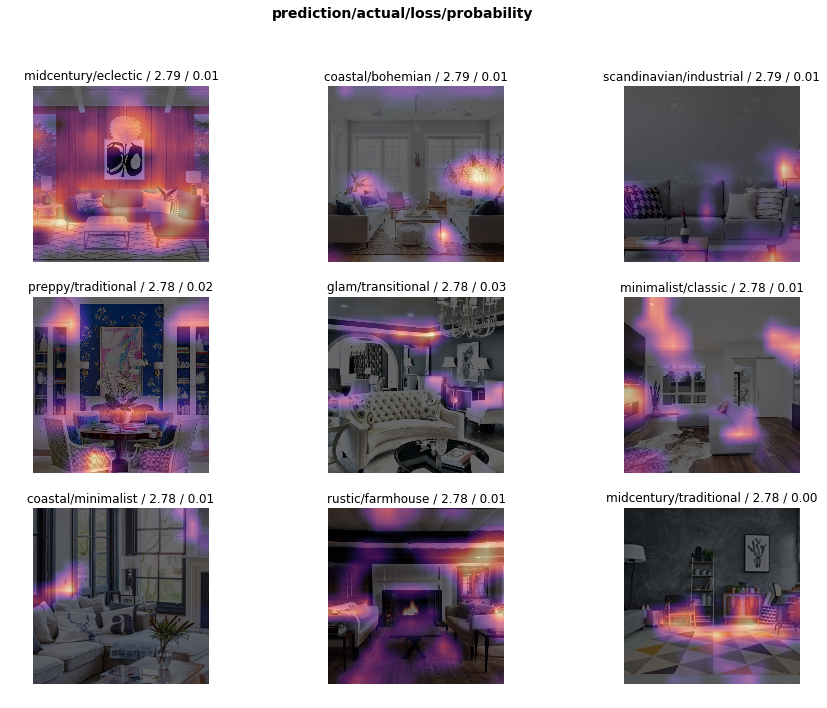

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

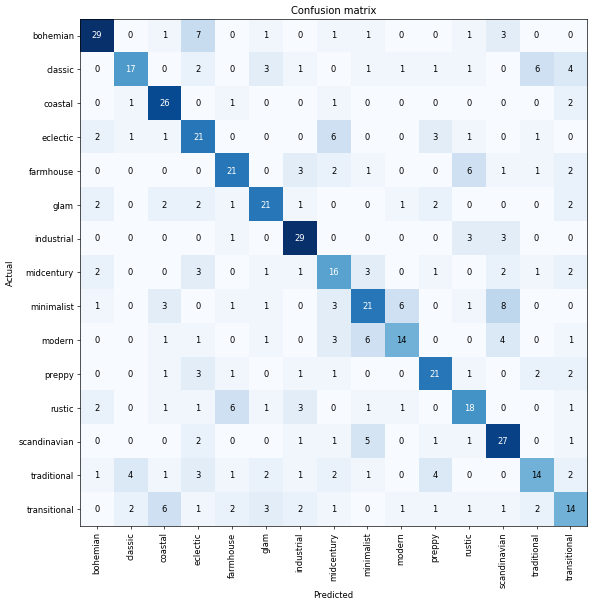

In [0]:
# how is the confusion in the confusion matrix?

interp.plot_confusion_matrix(figsize=(25, 10), dpi=60)

In [0]:
# where was the model more prone to make mistakes?
# which two classes are creating confusing more and more?

interp.most_confused(min_val=2)

[('minimalist', 'scandinavian', 8),
 ('bohemian', 'eclectic', 7),
 ('classic', 'traditional', 6),
 ('eclectic', 'midcentury', 6),
 ('farmhouse', 'rustic', 6),
 ('minimalist', 'modern', 6),
 ('modern', 'minimalist', 6),
 ('rustic', 'farmhouse', 6),
 ('transitional', 'coastal', 6),
 ('scandinavian', 'minimalist', 5),
 ('classic', 'transitional', 4),
 ('modern', 'scandinavian', 4),
 ('traditional', 'classic', 4),
 ('traditional', 'preppy', 4),
 ('bohemian', 'scandinavian', 3),
 ('classic', 'glam', 3),
 ('eclectic', 'preppy', 3),
 ('farmhouse', 'industrial', 3),
 ('industrial', 'rustic', 3),
 ('industrial', 'scandinavian', 3),
 ('midcentury', 'eclectic', 3),
 ('midcentury', 'minimalist', 3),
 ('minimalist', 'coastal', 3),
 ('minimalist', 'midcentury', 3),
 ('modern', 'midcentury', 3),
 ('preppy', 'eclectic', 3),
 ('rustic', 'industrial', 3),
 ('traditional', 'eclectic', 3),
 ('transitional', 'glam', 3),
 ('classic', 'eclectic', 2),
 ('coastal', 'transitional', 2),
 ('eclectic', 'bohemian',